# Activity 8 (IC2)

**Professor: Ricardo Prudêncio**

## Model Uncertainty (Incerteza de Modelo)

Task:

(PT-BR)
1. Escolha um problema de classificação e treine um pool de modelos com algoritmos de diferentes famílias.

2. Aplique cada modelo na base de teste e calcule a incerteza de cada um por instância, usando por exemplo, a entropia das probabilidades de classe ou a máxima probabilidade estimada pelo modelo.

3. Estime a incerteza aleatórica de cada instância usando a média da incerteza entre os modelos. Estime a incerteza epistêmica do pool usando a variância da incerteza entre os modelos. 

4. Faça uma análise exploratória tentando relacionar as caraterísticas do problema com as incertezas estimadas. Tente responder a pergunta: em que situações (para que características) a incerteza das instâncias é alta? Vc pode por exemplo:

(a) Escolher pares de atributos e fazer um gráfico de dispersão das instâncias de teste colorido por incerteza; ou

(b) Treinar um modelo surrogate, onde o atributo alvo é a medida de incerteza calculada (por modelo ou pelo pool).

(EN)
1. Choose a classification problem and train a pool of models with algorithms from different families.

2. Apply each model to the test set and calculate the uncertainty of each instance using, for example, the entropy of the class probabilities or the maximum estimated probability by the model.

3. Estimate the aleatory uncertainty of each instance using the average uncertainty between the models. Estimate the epistemic uncertainty of the pool using the variance of the uncertainty between the models. 

4. Perform an exploratory analysis to relate the characteristics of the problem with the estimated uncertainties. Try to answer the question: in which situations (for which characteristics) is the uncertainty of the instances high? You can for example:

(a) Choose pairs of attributes and make a scatter plot of the test instances colored by uncertainty; or

(b) Train a surrogate model, where the target attribute is the uncertainty measure calculated (by model or by pool).

## Resolution

1. Choose a classification problem and train a pool of models with algorithms from different families.

I chose the Titanic dataset (train.csv and test.csv) to predict whether a passenger survived. This dataset is a classic example for classification tasks, and it is often used for binary classification problems.

Since the scope of this activity is to explore model uncertainty, I will not focus on obtaining the best possible performance for the models, but rather on understanding the concept of uncertainty and how it behaves for different models and datasets.


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Load the training and testing datasets (assuming 'train.csv' and 'test.csv' are available in the working directory)
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Combine the datasets for consistent preprocessing (excluding target variable)
full_df = pd.concat([train_df, test_df], sort=False)

# Preprocess the dataset
# Drop unnecessary columns and handle missing values
full_df = full_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
full_df['Age'].fillna(full_df['Age'].median(), inplace=True)
full_df['Embarked'].fillna(full_df['Embarked'].mode()[0], inplace=True)
full_df['Fare'].fillna(full_df['Fare'].median(), inplace=True)

# Convert categorical variables into numeric
full_df = pd.get_dummies(full_df, columns=['Sex', 'Embarked'], drop_first=True)

# Split the processed data back into training and testing sets
train_processed = full_df[:len(train_df)]
test_processed = full_df[len(train_df):]

# Separate features and target variable for training data
X_train = train_processed.drop('Survived', axis=1)
y_train = train_processed['Survived']

# For the test data, check if 'Survived' column exists
if 'Survived' in test_processed.columns:
    X_test = test_processed.drop('Survived', axis=1)
    y_test = test_processed['Survived']
else:
    X_test = test_processed
    y_test = None  # Since the actual target might not be available

# Define models from different families
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
}

# Train each model and store them in a dictionary
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

2. Apply each model to the test set and calculate the uncertainty of each instance using, for example, the entropy of the class probabilities or the maximum estimated probability by the model.

In [17]:
# Here we have a dictionary with the trained models
trained_models

{'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Support Vector Machine': SVC(probability=True),
 'K-Nearest Neighbors': KNeighborsClassifier(),
 'Naive Bayes': GaussianNB(),
 'Logistic Regression': LogisticRegression(max_iter=1000),
 'Multi-layer Perceptron': MLPClassifier(max_iter=1000)}

The way the entropy is calculated can be examplified by the following case:

Let's say a person had a 0.7 chance of surviving and a 0.3 chance of not surviving. The entropy would be calculated by:

- H(Survived) = -0.7 * log(0.7) - 0.3 * log(0.3) = 0.36

Now, this calculation would be replicated for each model, and then for each instance. After that, the entropy values would be averaged for each instance across all models.

In [21]:
# Function to calculate entropy
def calculate_entropy(probs):
    import numpy as np  # Assuming numpy is already imported earlier
    return -np.sum(probs * np.log(probs + 1e-15), axis=1)  # Adding a small constant to avoid log(0)

# Dictionary to store uncertainty measures for each model
uncertainty_measures = {}

for name, model in trained_models.items():
    # Predict class probabilities
    probabilities = model.predict_proba(X_test)
    
    # Calculate entropy for each instance
    entropies = calculate_entropy(probabilities)
    
    # Store the entropies
    uncertainty_measures[name] = entropies

# Convert the dictionary to a DataFrame for better visualization
uncertainty_df = pd.DataFrame(uncertainty_measures)

# Display the first few rows of the uncertainty measures
print(f"Uncertainty measures for each model:")
print(uncertainty_df.head())

Uncertainty measures for each model:
   Decision Tree  Random Forest  Support Vector Machine  K-Nearest Neighbors  \
0  -1.110223e-15       0.253639                0.600237        -1.110223e-15   
1  -1.110223e-15       0.583259                0.604189        -1.110223e-15   
2  -1.110223e-15       0.422709                0.604749         6.730117e-01   
3  -1.110223e-15       0.626869                0.598847         6.730117e-01   
4  -1.110223e-15       0.692347                0.607850        -1.110223e-15   

   Naive Bayes  Logistic Regression  Multi-layer Perceptron  
0     0.340910             0.344052                0.323901  
1     0.679378             0.645203                0.659929  
2     0.578105             0.347933                0.299760  
3     0.165415             0.330605                0.317236  
4     0.648566             0.685188                0.675176  


It may make sense to average the uncertainty (entropy) per model across all instances. It allows us to assess the overall uncertainty of each model on the test dataset. By computing the average entropy for each model, we can compare how confident or uncertain each model tends to be in its predictions. This comparison can provide valuable insights into the models' performance and reliability over the entire dataset.

In [19]:
# Calculate the average uncertainty (entropy) for each model across all instances
average_uncertainty_per_model = uncertainty_df.mean(axis=0)

# Display the average uncertainty per model
print("Average Uncertainty for each model:")
print(average_uncertainty_per_model)


Average Uncertainty for each model:
Decision Tree             0.037104
Random Forest             0.349695
Support Vector Machine    0.613208
K-Nearest Neighbors       0.404651
Naive Bayes               0.325057
Logistic Regression       0.467328
Multi-layer Perceptron    0.442711
dtype: float64


3. Estimate the aleatory uncertainty of each instance using the average uncertainty between the models. Estimate the epistemic uncertainty of the pool using the variance of the uncertainty between the models.

In [20]:
# Calculate aleatory uncertainty as the mean entropy across models for each instance
aleatory_uncertainty = uncertainty_df.mean(axis=1)

# Calculate epistemic uncertainty as the variance of the entropies across models for each instance
epistemic_uncertainty = uncertainty_df.var(axis=1)

# Add these uncertainties to the DataFrame
uncertainty_df['Aleatory Uncertainty'] = aleatory_uncertainty
uncertainty_df['Epistemic Uncertainty'] = epistemic_uncertainty

# Display the first few rows of the uncertainties
print("Aleatory and Epistemic Uncertainties:")
print(uncertainty_df[['Aleatory Uncertainty', 'Epistemic Uncertainty']].head())

Aleatory and Epistemic Uncertainties:
   Aleatory Uncertainty  Epistemic Uncertainty
0              0.266106               0.044739
1              0.453137               0.096875
2              0.418038               0.053196
3              0.387426               0.065189
4              0.472732               0.105080


When multiple models disagree (high variance in predictions), it suggests that an instance is anomalous relative to the training data.

4. Perform an exploratory analysis to relate the characteristics of the problem with the estimated uncertainties. Try to answer the question: in which situations (for which characteristics) is the uncertainty of the instances high?

(a) Choose pairs of attributes and make a scatter plot of the test instances colored by uncertainty.

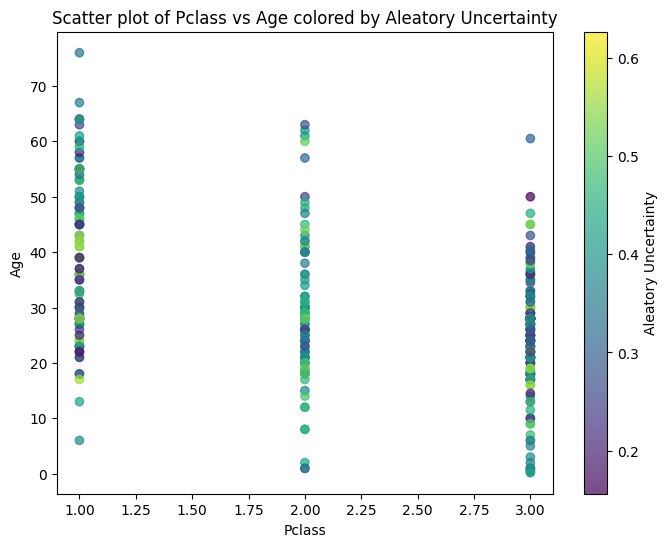

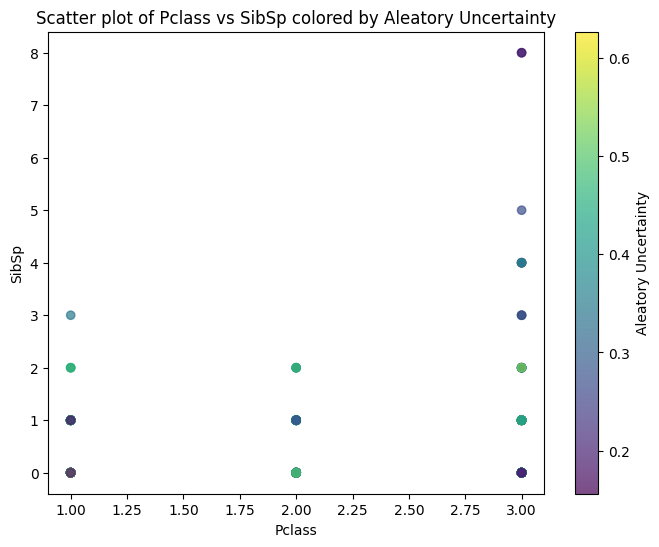

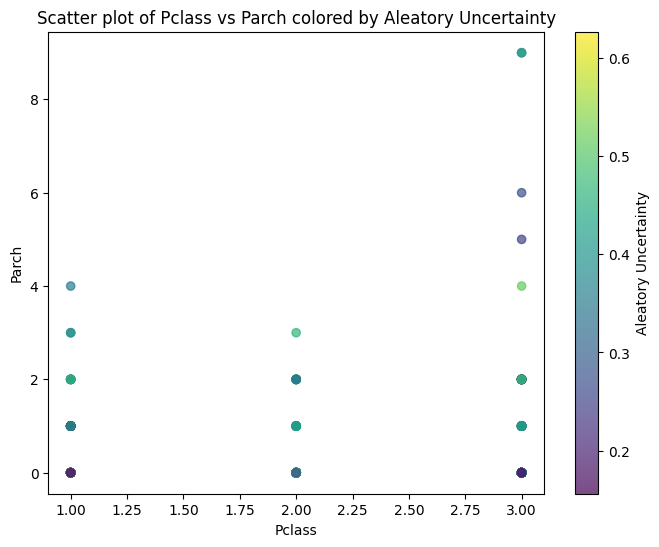

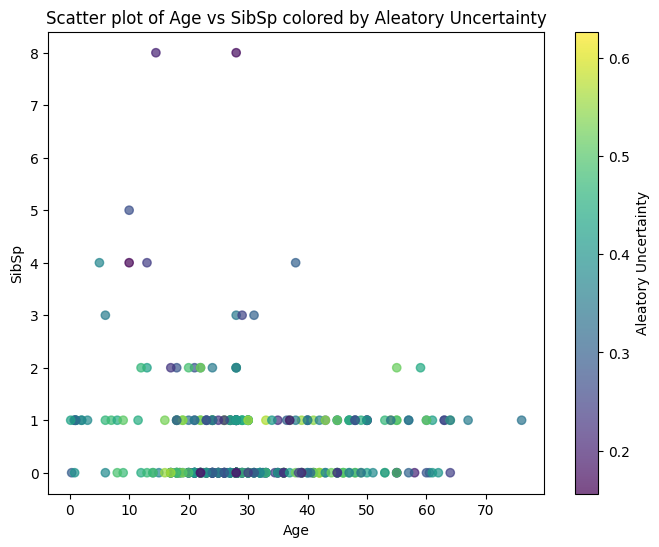

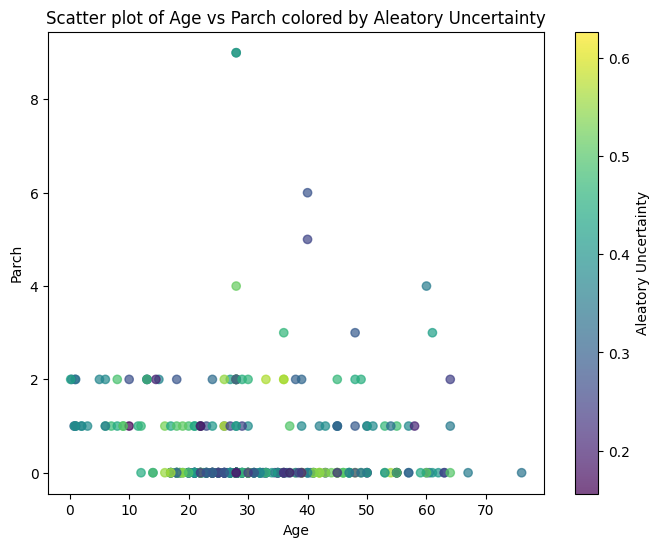

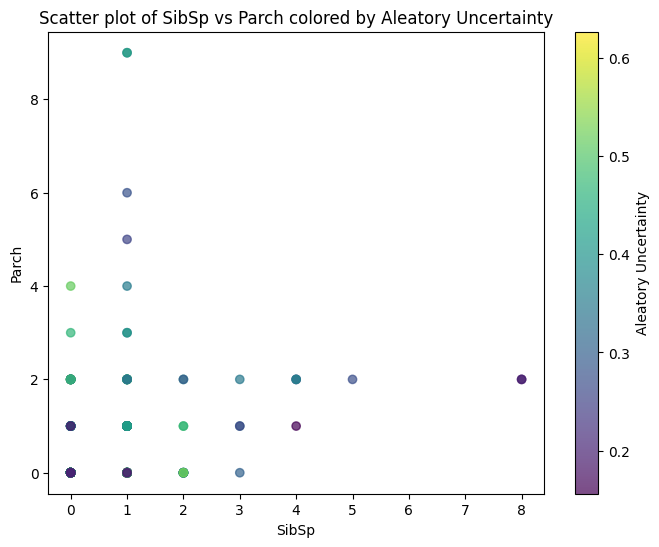

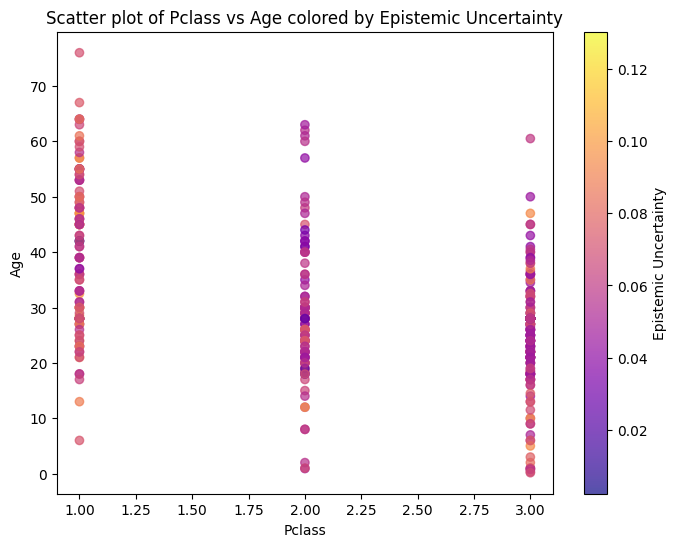

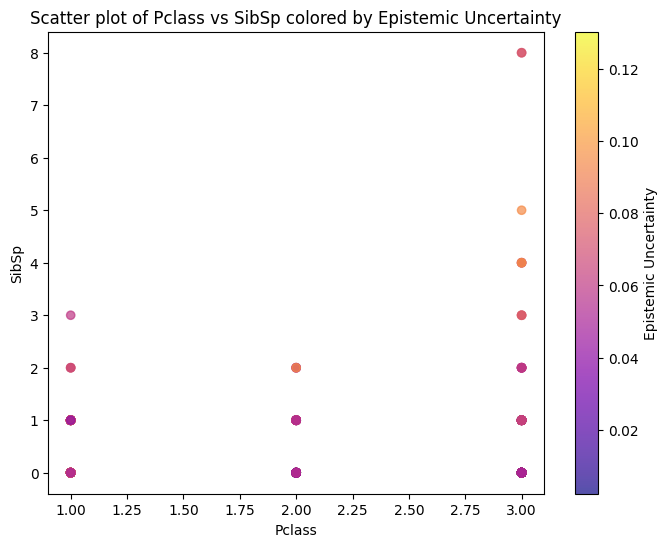

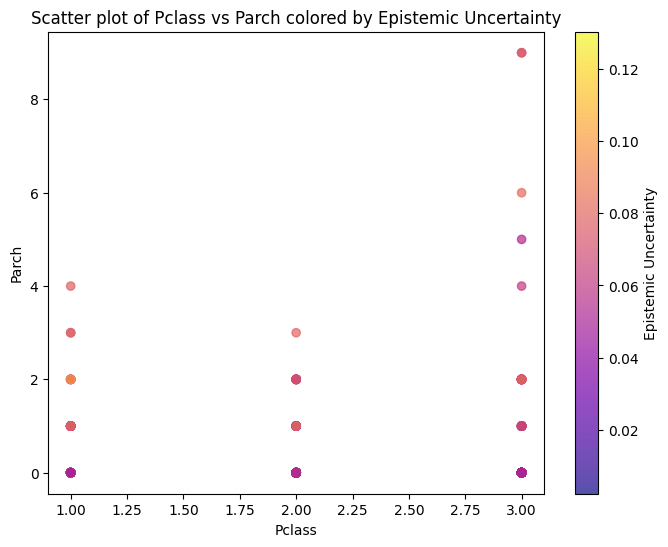

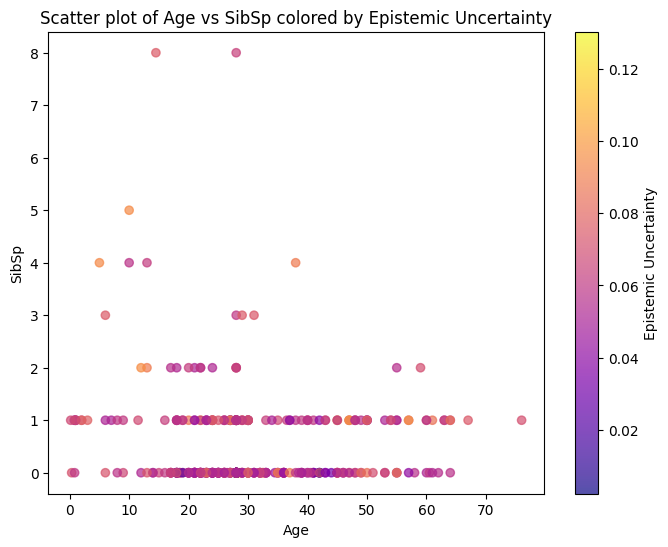

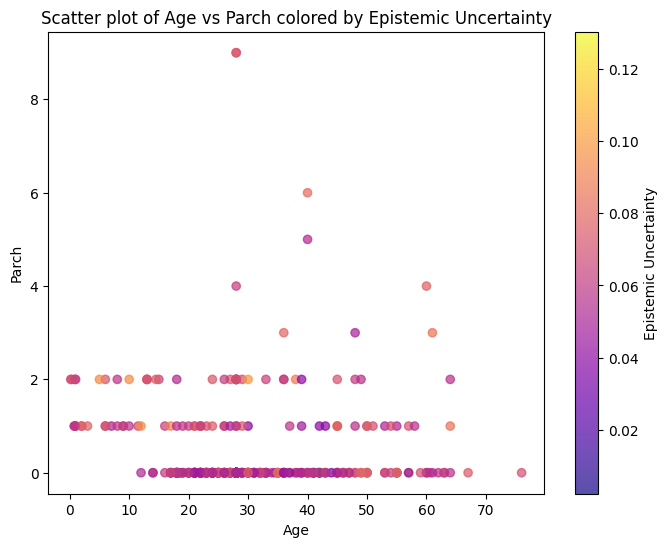

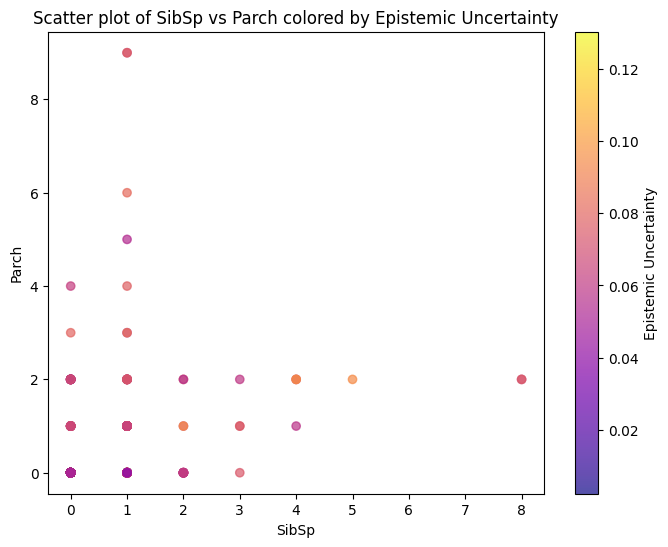

In [7]:
import matplotlib.pyplot as plt

# Reset the index to ensure alignment between X_test and uncertainty_df
X_test = X_test.reset_index(drop=True)
uncertainty_df = uncertainty_df.reset_index(drop=True)

# Concatenate X_test and uncertainties into a single DataFrame
test_data = pd.concat([X_test, uncertainty_df[['Aleatory Uncertainty', 'Epistemic Uncertainty']]], axis=1)

# Select numerical features
numerical_features = X_test.select_dtypes(include=['int64', 'float64']).columns

# Select pairs of numerical features to plot
# For simplicity, we'll select the first 4 numerical features
selected_features = numerical_features[:4]

# Generate all possible pairs from selected_features
from itertools import combinations
feature_pairs = list(combinations(selected_features, 2))

# For each pair, make a scatter plot colored by Aleatory Uncertainty
for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(test_data[x_feature], test_data[y_feature],
                          c=test_data['Aleatory Uncertainty'], cmap='viridis', alpha=0.7)
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'Scatter plot of {x_feature} vs {y_feature} colored by Aleatory Uncertainty')
    plt.colorbar(scatter, label='Aleatory Uncertainty')
    plt.show()

# Additionally, plot the same pairs colored by Epistemic Uncertainty
for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(test_data[x_feature], test_data[y_feature],
                          c=test_data['Epistemic Uncertainty'], cmap='plasma', alpha=0.7)
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'Scatter plot of {x_feature} vs {y_feature} colored by Epistemic Uncertainty')
    plt.colorbar(scatter, label='Epistemic Uncertainty')
    plt.show()

(b) Train a surrogate model, where the target attribute is the uncertainty measure calculated (by model or by pool).


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare the data for surrogate modeling
X = test_data.drop(['Aleatory Uncertainty', 'Epistemic Uncertainty'], axis=1)
y_aleatory = test_data['Aleatory Uncertainty']
y_epistemic = test_data['Epistemic Uncertainty']

# Split the data into training and validation sets for Aleatory Uncertainty
X_train_a, X_val_a, y_train_a, y_val_a = train_test_split(X, y_aleatory, test_size=0.2, random_state=42)

# Train a surrogate model for Aleatory Uncertainty
aleatory_model = RandomForestRegressor(n_estimators=100, random_state=42)
aleatory_model.fit(X_train_a, y_train_a)

# Predict and evaluate the model on validation set
y_pred_a = aleatory_model.predict(X_val_a)
mse_aleatory = mean_squared_error(y_val_a, y_pred_a)
print(f'Mean Squared Error for Aleatory Uncertainty Surrogate Model: {mse_aleatory}')

# Split the data into training and validation sets for Epistemic Uncertainty
X_train_e, X_val_e, y_train_e, y_val_e = train_test_split(X, y_epistemic, test_size=0.2, random_state=42)

# Train a surrogate model for Epistemic Uncertainty
epistemic_model = RandomForestRegressor(n_estimators=100, random_state=42)
epistemic_model.fit(X_train_e, y_train_e)

# Predict and evaluate the model on validation set
y_pred_e = epistemic_model.predict(X_val_e)
mse_epistemic = mean_squared_error(y_val_e, y_pred_e)
print(f'Mean Squared Error for Epistemic Uncertainty Surrogate Model: {mse_epistemic}')


Mean Squared Error for Aleatory Uncertainty Surrogate Model: 0.005044266004148982
Mean Squared Error for Epistemic Uncertainty Surrogate Model: 0.0002700437351819733


We got a MSE of 0.005 for the aleatory uncertainty and 0.0002 for the epistemic uncertainty. An MSE close to zero for the epistemic uncertainty surrogate model indicates that the model is predicting the epistemic uncertainty almost perfectly on the validation set. This may indicate that the epistemic uncertainty is well-captured by the surrogate model. Also, the epistemic uncertainty is highly predictable from the input features in X, which might occur if the epistemic uncertainty is directly related to these features. Regarding the Aleatory uncertainty, the MSE is (a little bit) higher, indicating that the aleatory uncertainty may be less predictable from the input features.